In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras import layers

In [98]:
# read the dataset
(X_train, y_train), (X_test,y_test) = tf.keras.datasets.mnist.load_data()

In [99]:
def display_image(training_images, training_labels, number_of_images_disply, name_of_dataset):
    
    if not training_images.shape[0] == 0:
        # display images from the dataset
        index= []
        while  len(index) < number_of_images_disply:
            i = np.random.randint(0,training_labels.shape[0])
            index.append(i)

        print(training_images[0].shape)
        
        

        num_rows = 1  # Number of rows
        num_cols = len(index)  # Number of columns

            # Create a figure with a grid layout
        fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 4))

            # If there is only one image, `axes` is not a list, so we need to convert it to a list
        if num_cols == 1:
            axes = [axes]

            # Iterate through the images and display them
        for i, ax in enumerate(axes):
            ax.imshow(training_images[index[i]])
           
            ax.axis('off')
            

        plt.title(f"Images from datasets {name_of_dataset}")
        plt.show()

    else:
        ValueError("training_x_images doesn't contain images, it is empty")

(28, 28)


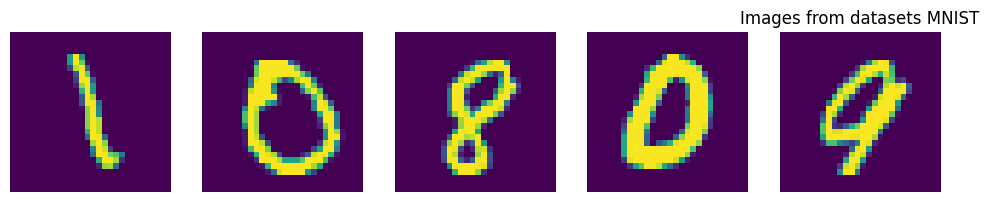

In [100]:
display_image(X_train,y_train,5,"MNIST")

In [101]:
X_train = X_train.reshape(X_train.shape[0],28,28,1).astype('float32')

In [102]:
X_train.shape

(60000, 28, 28, 1)

In [103]:
X_train[0].min(),X_train[0].max()

(0.0, 255.0)

As we have noticed now the min max values has different ranges so it is better to have them on the same range. Which makes processing faster and efficient.

In [104]:
# Normalization of image data
#X_train = X_train / 255.0
X_train = (X_train - 127.5) / 127.5

In [106]:
buffer_size = 60000
batch_size = 256

In [108]:
# Convert the array to tensor
X_train = tf.data.Dataset.from_tensor_slices(X_train).shuffle(buffer_size).batch(batch_size)

In [111]:
!git push

To https://github.com/GVanave/Image-Generation-with-GAN
   b9c8bad..076a216  main -> main


# Design the Generator

In [122]:


def Generator():
    generator_net = tf.keras.Sequential()

    generator_net.add(layers.Dense(7*7*256, input_shape=(100,)) ) # Fully connected layer
    generator_net.add(layers.BatchNormalization())
    generator_net.add(layers.LeakyReLU())

    # Reshape the input because we want to use the convolutional layers
    generator_net.add(layers.Reshape((7, 7, 256)))
    generator_net.add(layers.Conv2DTranspose(128, (5, 5), strides=(2, 2), padding='same'))
    generator_net.add(layers.BatchNormalization())
    generator_net.add(layers.LeakyReLU())

    generator_net.add(layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same'))
    generator_net.add(layers.BatchNormalization())
    generator_net.add(layers.LeakyReLU())

    generator_net.add(layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', activation='sigmoid'))
    generator_net.add(layers.BatchNormalization())

    generator_net.summary()

    return generator_net



In [124]:
generator = Generator()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 12544)             1266944   
                                                                 
 batch_normalization_12 (Bat  (None, 12544)            50176     
 chNormalization)                                                
                                                                 
 leaky_re_lu_9 (LeakyReLU)   (None, 12544)             0         
                                                                 
 reshape_3 (Reshape)         (None, 7, 7, 256)         0         
                                                                 
 conv2d_transpose_9 (Conv2DT  (None, 14, 14, 128)      819328    
 ranspose)                                                       
                                                                 
 batch_normalization_13 (Bat  (None, 14, 14, 128)     